In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightning as L

import torch
import torch.nn as nn

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader



In [2]:
inputs = torch.tensor([[1., 0., 0., 0., 0., 0.], # I
                       [0., 1., 0., 0., 0., 0.], # You
                       [0., 0., 1., 0., 0., 0.], # Like
                       [0., 0., 0., 1., 0., 0.], # Hate
                       [0., 0., 0., 0., 1., 0.], # Pizza
                       [0., 0., 0., 0., 0., 1.]]) # Cheese

labels = torch.tensor([[0., 0., 1., 0., 0., 0.], # "I" is followed by "Like"
                       [0., 0., 0., 1., 0., 0.], # "You" is followed by "Hate"
                       [0., 0., 0., 0., 1., 0.], # "Like" is followed by "Pizza"
                       [0., 0., 0., 0., 0., 1.], # "Hate" is followed by "Cheese"
                       [0., 0., 0., 0., 1., 0.], # "Pizza" isn't followed by anything
                       [0., 0., 0., 0., 0., 1.]]) # "Cheese" isn't followed by anything

In [3]:
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [4]:
class WordEmbedScratch(L.LightningModule):

    def __init__(self):
        super().__init__()

        L.seed_everything(seed=42)

        min, max = -.5, .5

        # Inputs
        self.input1_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input1_w2 = nn.Parameter(Uniform(min, max).sample())

        self.input2_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input2_w2 = nn.Parameter(Uniform(min, max).sample())

        self.input3_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input3_w2 = nn.Parameter(Uniform(min, max).sample())

        self.input4_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input4_w2 = nn.Parameter(Uniform(min, max).sample())

        self.input5_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input5_w2 = nn.Parameter(Uniform(min, max).sample())

        self.input6_w1 = nn.Parameter(Uniform(min, max).sample())
        self.input6_w2 = nn.Parameter(Uniform(min, max).sample())

        # Outputs
        self.output1_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output1_w2 = nn.Parameter(Uniform(min, max).sample())

        self.output2_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output2_w2 = nn.Parameter(Uniform(min, max).sample())

        self.output3_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output3_w2 = nn.Parameter(Uniform(min, max).sample())

        self.output4_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output4_w2 = nn.Parameter(Uniform(min, max).sample())

        self.output5_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output5_w2 = nn.Parameter(Uniform(min, max).sample())

        self.output6_w1 = nn.Parameter(Uniform(min, max).sample())
        self.output6_w2 = nn.Parameter(Uniform(min, max).sample())

        # Loss
        self.loss = nn.CrossEntropyLoss()


    def forward(self, input):
        input = input[0]

        # Inputs
        top_inputs = ((input[0] * self.input1_w1) +
                      (input[1] * self.input2_w1) +
                      (input[2] * self.input3_w1) +
                      (input[3] * self.input4_w1) +
                      (input[4] * self.input5_w1) +
                      (input[5] * self.input6_w1))

        bottom_inputs = ((input[0] * self.input1_w2) +
                         (input[1] * self.input2_w2) +
                         (input[2] * self.input3_w2) +
                         (input[3] * self.input4_w2) +
                         (input[4] * self.input5_w2) +
                         (input[5] * self.input6_w2))

        # Outputs
        output1 = ((top_inputs * self.output1_w1) +
                   (bottom_inputs * self.output1_w2))
        output2 = ((top_inputs * self.output2_w1) +
                   (bottom_inputs * self.output2_w2))
        output3 = ((top_inputs * self.output3_w1) +
                   (bottom_inputs * self.output3_w2))
        output4 = ((top_inputs * self.output4_w1) +
                   (bottom_inputs * self.output4_w2))
        output5 = ((top_inputs * self.output5_w1) +
                   (bottom_inputs * self.output5_w2))
        output6 = ((top_inputs * self.output6_w1) +
                   (bottom_inputs * self.output6_w2))

        outputs_combined = torch.stack([output1, output2, output3, output4, output5, output6])

        return outputs_combined


    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)


    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0])

        return loss




In [5]:
model_scratch = WordEmbedScratch()

print("Before optimization, the parameters are...")
for name, param in model_scratch.named_parameters():
    print(name, torch.round(param.data, decimals=2))

Seed set to 42


Before optimization, the parameters are...
input1_w1 tensor(0.3800)
input1_w2 tensor(0.4200)
input2_w1 tensor(-0.1200)
input2_w2 tensor(0.4600)
input3_w1 tensor(-0.1100)
input3_w2 tensor(0.1000)
input4_w1 tensor(-0.2400)
input4_w2 tensor(0.2900)
input5_w1 tensor(0.4400)
input5_w2 tensor(-0.3700)
input6_w1 tensor(0.4300)
input6_w2 tensor(0.0900)
output1_w1 tensor(0.3700)
output1_w2 tensor(0.0700)
output2_w1 tensor(0.2400)
output2_w2 tensor(-0.0700)
output3_w1 tensor(0.3900)
output3_w2 tensor(0.0700)
output4_w1 tensor(-0.2300)
output4_w2 tensor(0.1300)
output5_w1 tensor(-0.2300)
output5_w2 tensor(-0.0600)
output6_w1 tensor(-0.2000)
output6_w2 tensor(0.3300)


In [6]:
data = {
    'w1': [model_scratch.input1_w1.item(),
           model_scratch.input2_w1.item(),
           model_scratch.input3_w1.item(),
           model_scratch.input4_w1.item(),
           model_scratch.input5_w1.item(),
           model_scratch.input6_w1.item()],
    'w2': [model_scratch.input1_w2.item(),
           model_scratch.input2_w2.item(),
           model_scratch.input3_w2.item(),
           model_scratch.input4_w2.item(),
           model_scratch.input5_w2.item(),
           model_scratch.input6_w2.item()],
    'token': ['I', 'You', 'Like', 'Hate', 'Pizza', 'Cheese'],
    'input': ['input1', 'input2', 'input3', 'input4', 'input5', 'input6']
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.382269,0.415004,I,input1
1,-0.117136,0.459306,You,input2
2,-0.109552,0.100895,Like,input3
3,-0.243428,0.293641,Hate,input4
4,0.440771,-0.366814,Pizza,input5
5,0.434598,0.093580,Cheese,input6


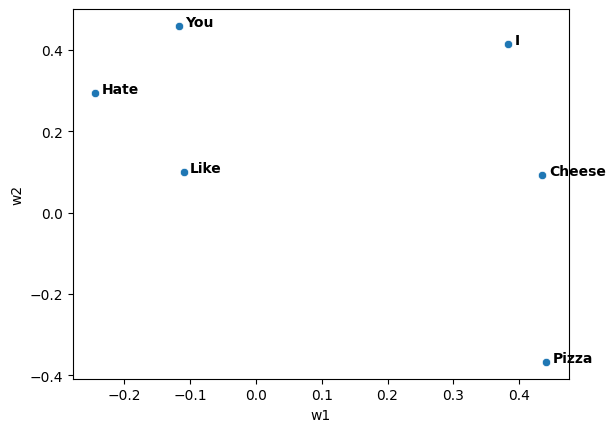

In [7]:
sns.scatterplot(data=df, x='w1', y='w2')

for i in range(0, 6):
    plt.text(df.w1[i]+.01, df.w2[i], df.token[i],
             horizontalalignment='left', 
             size='medium',
             color='black',
             weight='semibold')
plt.show()

In [9]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model_scratch, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\jcrow\OneDrive\Desktop\Projects\Word Embeddings\word_embeddings\.venv\lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 24    
--------------------------------------------------
24        Trainable params
0      

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=100` reached.


In [10]:
print('After optimization, the parameters are...')
for name, param in model_scratch.named_parameters():
    print(name, torch.round(param.data, decimals=2))

After optimization, the parameters are...
input1_w1 tensor(3.0200)
input1_w2 tensor(0.6500)
input2_w1 tensor(-3.5700)
input2_w2 tensor(0.7000)
input3_w1 tensor(-1.1600)
input3_w2 tensor(-2.5300)
input4_w1 tensor(0.1500)
input4_w2 tensor(3.6900)
input5_w1 tensor(-0.9900)
input5_w2 tensor(-2.6200)
input6_w1 tensor(0.1100)
input6_w2 tensor(3.5000)
output1_w1 tensor(0.3900)
output1_w2 tensor(-0.6300)
output2_w1 tensor(0.3900)
output2_w2 tensor(-0.6200)
output3_w1 tensor(3.4300)
output3_w2 tensor(-0.2200)
output4_w1 tensor(-2.6900)
output4_w2 tensor(0.2100)
output5_w1 tensor(-1.1100)
output5_w2 tensor(-3.8300)
output6_w1 tensor(-0.0100)
output6_w2 tensor(2.4900)


In [11]:
data = {
    'w1': [model_scratch.input1_w1.item(),
           model_scratch.input2_w1.item(),
           model_scratch.input3_w1.item(),
           model_scratch.input4_w1.item(),
           model_scratch.input5_w1.item(),
           model_scratch.input6_w1.item()],
    'w2': [model_scratch.input1_w2.item(),
           model_scratch.input2_w2.item(),
           model_scratch.input3_w2.item(),
           model_scratch.input4_w2.item(),
           model_scratch.input5_w2.item(),
           model_scratch.input6_w2.item()],
    'token': ['I', 'You', 'Like', 'Hate', 'Pizza', 'Cheese'],
    'input': ['input1', 'input2', 'input3', 'input4', 'input5', 'input6']
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,3.015088,0.645647,I,input1
1,-3.568773,0.702606,You,input2
2,-1.155670,-2.534612,Like,input3
3,0.147331,3.694168,Hate,input4
4,-0.991834,-2.619006,Pizza,input5
5,0.108220,3.497420,Cheese,input6


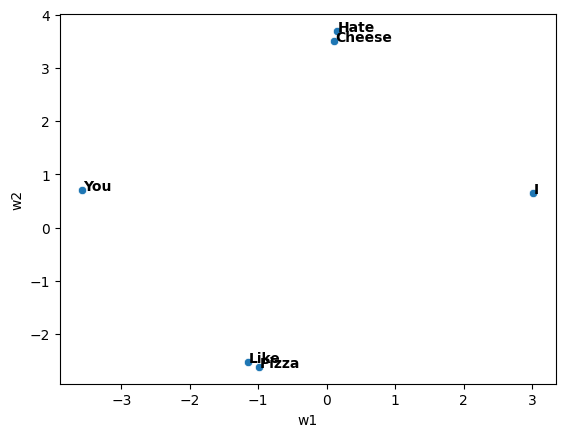

In [12]:
sns.scatterplot(data=df, x='w1', y='w2')

for i in range(0, 6):
    plt.text(df.w1[i]+.01, df.w2[i], df.token[i],
             horizontalalignment='left', 
             size='medium',
             color='black',
             weight='semibold')
plt.show()

In [13]:
softmax = nn.Softmax(dim=0)

print(torch.round(softmax(model_scratch(torch.tensor([[1., 0., 0., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_scratch(torch.tensor([[0., 1., 0., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_scratch(torch.tensor([[0., 0., 1., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_scratch(torch.tensor([[0., 0., 0., 1., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_scratch(torch.tensor([[0., 0., 0., 0., 1., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_scratch(torch.tensor([[0., 0., 0., 0., 0., 1.]]))),
                 decimals=2))

tensor([0., 0., 1., 0., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 1., 0., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 0., 0., 1.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 0., 1., 0.], grad_fn=<RoundBackward1>)
tensor([0., 0., 0., 0., 0., 1.], grad_fn=<RoundBackward1>)


In [14]:
class WordEmbedLinear(L.LightningModule):

    def __init__(self):
        super().__init__()

        L.seed_everything(seed=42)

        self.inputs = nn.Linear(in_features=6, out_features=2, bias=False)

        self.outputs = nn.Linear(in_features=2, out_features=6, bias=False)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        hidden = self.inputs(input)

        output = self.outputs(hidden)

        return output

    
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=.1)

    
    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i)

        return loss

In [15]:
model_linear = WordEmbedLinear()

print("Before optimization, the parameters are...")
for name, param in model_linear.named_parameters():
    print(name, torch.round(param.data, decimals=2))

Seed set to 42


Before optimization, the parameters are...
inputs.weight tensor([[ 0.3100,  0.3400, -0.1000,  0.3800, -0.0900,  0.0800],
        [-0.2000,  0.2400,  0.3600, -0.3000,  0.3500,  0.0800]])
outputs.weight tensor([[ 0.5200,  0.1000],
        [ 0.3400, -0.1000],
        [ 0.5500,  0.1000],
        [-0.3300,  0.1800],
        [-0.3300, -0.0800],
        [-0.2900,  0.4700]])


In [17]:
data = {
    'w1': model_linear.inputs.weight.detach()[0].numpy(),
    'w2': model_linear.inputs.weight.detach()[1].numpy(),
    'token': ['I', 'You', 'Like', 'Hate', 'Pizza', 'Cheese'],
    'input': ['input1', 'input2', 'input3', 'input4', 'input5', 'input6']
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.312122,-0.198758,I,input1
1,0.338849,0.239757,You,input2
2,-0.095641,0.359888,Like,input3
3,0.375022,-0.299502,Hate,input4
4,-0.089449,0.354848,Pizza,input5
5,0.082381,0.076407,Cheese,input6


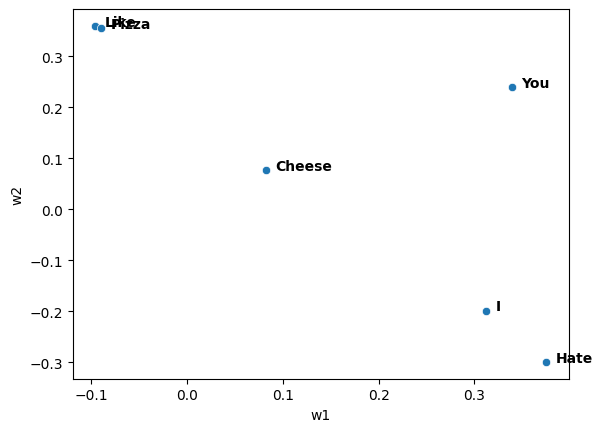

In [18]:
sns.scatterplot(data=df, x='w1', y='w2')

for i in range(0, 6):
    plt.text(df.w1[i]+.01, df.w2[i], df.token[i],
             horizontalalignment='left', 
             size='medium',
             color='black',
             weight='semibold')
plt.show()

In [20]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model_linear, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type             | Params
---------------------------------------------
0 | inputs  | Linear           | 12    
1 | outputs | Linear           | 12    
2 | loss    | CrossEntropyLoss | 0     
---------------------------------------------
24        Trainable params
0         Non-trainable params
24        Total params
0.000     Total estimated model params size (MB)
C:\Users\jcrow\OneDrive\Desktop\Projects\Word Embeddings\word_embeddings\.venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\jcrow\OneDrive\Desktop\Projects\Word Embeddings\word_embeddings\.venv\lib\site-packages\lightning\pyto

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=100` reached.


In [22]:
print("After optimization, the parameters are...")
for name, param in model_linear.named_parameters():
    print(name, torch.round(param.data, decimals=2))

After optimization, the parameters are...
inputs.weight tensor([[ 2.2300,  2.8300, -2.4200, -0.7700, -2.3900, -0.7900],
        [-2.1400,  1.8200, -0.0100,  3.3500, -0.0400,  3.4000]])
outputs.weight tensor([[-0.4800, -2.4100],
        [-0.5300, -2.5200],
        [ 2.6100, -3.9200],
        [ 2.9600,  0.7500],
        [-4.6700, -1.1300],
        [-1.0400,  2.4100]])


In [23]:
data = {
    'w1': model_linear.inputs.weight.detach()[0].numpy(),
    'w2': model_linear.inputs.weight.detach()[1].numpy(),
    'token': ['I', 'You', 'Like', 'Hate', 'Pizza', 'Cheese'],
    'input': ['input1', 'input2', 'input3', 'input4', 'input5', 'input6']
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,2.226017,-2.142142,I,input1
1,2.834800,1.819842,You,input2
2,-2.416843,-0.007501,Like,input3
3,-0.774124,3.347515,Hate,input4
4,-2.387467,-0.036846,Pizza,input5
5,-0.790265,3.398816,Cheese,input6


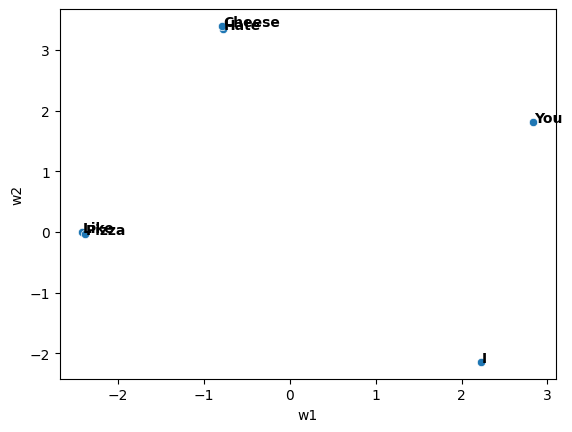

In [24]:
sns.scatterplot(data=df, x='w1', y='w2')

for i in range(0, 6):
    plt.text(df.w1[i]+.01, df.w2[i], df.token[i],
             horizontalalignment='left', 
             size='medium',
             color='black',
             weight='semibold')
plt.show()

In [27]:
softmax = nn.Softmax(dim=1)

print(torch.round(softmax(model_linear(torch.tensor([[1., 0., 0., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_linear(torch.tensor([[0., 1., 0., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_linear(torch.tensor([[0., 0., 1., 0., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_linear(torch.tensor([[0., 0., 0., 1., 0., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_linear(torch.tensor([[0., 0., 0., 0., 1., 0.]]))),
                 decimals=2))

print(torch.round(softmax(model_linear(torch.tensor([[0., 0., 0., 0., 0., 1.]]))),
                 decimals=2))

tensor([[0., 0., 1., 0., 0., 0.]], grad_fn=<RoundBackward1>)
tensor([[0., 0., 0., 1., 0., 0.]], grad_fn=<RoundBackward1>)
tensor([[0., 0., 0., 0., 1., 0.]], grad_fn=<RoundBackward1>)
tensor([[0., 0., 0., 0., 0., 1.]], grad_fn=<RoundBackward1>)
tensor([[0., 0., 0., 0., 1., 0.]], grad_fn=<RoundBackward1>)
tensor([[0., 0., 0., 0., 0., 1.]], grad_fn=<RoundBackward1>)


In [28]:
model_linear.inputs.weight

Parameter containing:
tensor([[ 2.2260,  2.8348, -2.4168, -0.7741, -2.3875, -0.7903],
        [-2.1421,  1.8198, -0.0075,  3.3475, -0.0368,  3.3988]],
       requires_grad=True)

In [29]:
word_embeddings = nn.Embedding.from_pretrained(model_linear.inputs.weight.T)

In [30]:
word_embeddings.weight

Parameter containing:
tensor([[ 2.2260, -2.1421],
        [ 2.8348,  1.8198],
        [-2.4168, -0.0075],
        [-0.7741,  3.3475],
        [-2.3875, -0.0368],
        [-0.7903,  3.3988]])

In [32]:
word_embeddings(torch.tensor(0))

tensor([ 2.2260, -2.1421])

In [33]:
vocab = {'I': 0,
         'You': 1,
         'Like': 2, 
         'Hate': 3,
         'Pizza': 4,
         'Cheese': 5}

In [34]:
word_embeddings(torch.tensor(vocab['I']))

tensor([ 2.2260, -2.1421])

In [35]:
word_embeddings(torch.tensor(vocab['You']))

tensor([2.8348, 1.8198])